<center>
<h1> Projet 2 : Problèmes aux moindres carrés </h1>
<h1> Année 2022-2023 - IENM2 </h1>
<h1> Nom :  </h1>
<h1> Prénom:  </h1>   
<h1> Date de remise : vendredi 22 janvier à 18h00? </h1>
</center>

## Algorithme de Gauss-Newton - Objectifs 

<div style="background:MistyRose">
<br>
L'objectif est de programmer les méthodes de Gauss-Newton (voir page 58 du polycopié) pour un problème aux moindres carrés
$$
({\cal P})\left\{ 
\begin{array}{l}
Min\;\;f(\beta)=(1/2)||r(\beta)||^2 \\ 
\beta \in \mathbb{R}^p
\end{array}
\right. 
$$
où $r$ est la fonction résidus
$$ 
\begin{array}{cc}
    r:\mathbb{R}^p  & \rightarrow & {\mathbb{R}^n} \\
            {\beta} & \rightarrow & r(\beta).
 \end{array}
 $$
    
L'objectif est d'utiliser un code générique pour l'algorithme de Gauss-Newton et pour l'algorithme de Newton pour la  résolution du problème aux moindres carrés.
    
### On prendra comme critères d'arrêt
  
On note $\beta^{(0)}$ le point initial et $\beta^{(k)}$ l'itéré courant. On pose aussi `Tol_rel` et `Tol_abs`$=\sqrt{\varepsilon_{mach}}$, les tolérances relatives et absolue pour les tests d'arrêt.

($\varepsilon_{mach}=$`numpy.finfo(float).eps` en python).
    
Les tests d'arrêt seront les suivants~:

* $\|\nabla f(\beta^{(k+1)})\|$ petit~: $\|\nabla f(\beta^{(k+1)})\| \leq \max($ `Tol_rel` $\|\nabla f(\beta^{(0)})\|,$ `Tol_abs` $)$;
* Evolution de $f(\beta^{(k+1)})$ petit~: $|f(\beta^{(k+1)}) - f(\beta^{(k)})| \leq \max($ `Tol_rel` $|f(\beta^{(k)})|,$ `Tol_abs` $)$
* Evolution du pas $s^{(k)}=\beta^{(k+1)}-\beta^{(k)}$ petit~: $\|\beta^{(k+1)}-\beta^{(k)}\| \leq \max($ `Tol_rel` $\|\beta^{(k)}\|,$ `Tol_abs` $)$
* Le nombre d'itérations maximal est atteint.




### Import des bibliothèques Python nécessaires

In [1]:
import math
import numpy as np
from numpy import linalg
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D  
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

### Algorithme de Gauss-Newton

<div style="background:LightGrey">

- Coder l'algorithme de Gauss-Newton. 
    

In [2]:
def GN_ref(r,Jr,beta0,option):
    """
    #******************************************************************************
    # Joseph Gergaud                                                              *
    # Novembre 2017                                                               *
    # Université de Toulouse, INP-ENSEEIHT                                        *
    #******************************************************************************
    #
    # GN_ref résout par l'algorithme de Gauss-Newton les problèmes aux moindres carrés
    # Min 0.5||r(beta)||^2
    # beta \in R^p
    #
    # Paramètres en entrés
    # --------------------
    # r      : fonction qui code les résidus
    #          r : \IR^p --> \IR^n
    # Jr     : fonction qui code la matrice jacobienne
    #          Jr : \IR^p --> real(n,p)
    # beta0  : point de départ
    #          real(p)
    # option[0] : Tol_abs, tolérance absolue
    #             float
    # option[1] : Tol_rel, tolérance relative
    #             float
    # option[2] : nitimax, nombre d'itérations maximum
    #             integer
    #
    # Paramètres en sortie
    # --------------------
    # beta      : beta
    #             real(p)
    # norm_gradf_beta : ||gradient f(beta)||
    #                   float
    # f_beta    : f(beta)
    #             float
    # res       : r(beta)
    #             float(n)
    # norm_s     : ||s||
    #              float
    # exitflag   : indicateur de sortie
    #              =1 si premier test d'arrêt vrai
    #              =2 si deuxième test d'arrêt vrai
    #              =3 si troisième test d'arrêt vrai
    #              =4 si quatrième test d'arrêt vrai
    #      
    # ---------------------------------------------------------------------------------
    #
    """
    # Initialisation
    beta0   = beta0[:]
    Tol_abs = option[0]
    Tol_rel = option[1]
    nbitmax = option[2]
    
    # beta, norm_gradf_beta, f_beta, res, norm_delta, k, exitflag
    
    beta    = beta0[:]
    res       = r(beta)
    Jres      = Jr(beta)
    norm_gradf_beta = np.linalg.norm(np.dot(Jres.T,res))
    f_beta    = np.dot(res.T,res)
    norm_s = 0
    k         = 0
    exitflag  = 0
    
    # Inserer vos lignes de code ici 
    #
    
    
      
    return (beta, norm_gradf_beta, f_beta, res, norm_s, k, exitflag)

### Application: datation au carbone radioactif $^{14}C$

<div style="background:MistyRose">
<br>
 Nous allons ici voir un exemple d'application de l'algorithme de Gauss-Newton.

Le carbone radioactif $^{14}C$ est produit dans
l'atmosphère par l'effet des rayons cosmiques sur l'azote
atmosphérique. Il est oxydé en $^{14}CO_{2}$ et absorbé sous
cette forme par les organismes vivants qui, par suite, contiennent un
certain pourcentage de carbone radioactif relativement aux carbones $^{12}C$
et $^{13}C\,$ qui sont stables. On suppose que la production de carbone $%
^{14}C$ atmosphérique est demeurée constante durant les derniers
millénaires. On suppose d'autre part que, lorsqu'un organisme meurt, ses
échanges avec l'atmosphère cessent et que la radioactivité due
au carbone $^{14}C\,$ décroit suivant la loi exponentielle suivante: 

$$
A(t)=A_{0}e^{-\lambda t}
$$

où $\lambda$ est une constante positive, $t$ représente le
temps en année, et $A(t)$ est la radioactivité exprimée en nombre
de désintégrations par minute et par gramme de carbone. 

On
désire estimer les paramètres $A_{0}$ et $\lambda $ par la
méthode des moindres carrés. Pour cela on analyse les troncs (le
bois est un tissu mort) de très vieux arbres "Sequoia gigantea" et 
"Pinus aristaca". Par un prélèvement effectué sur le tronc,
on peut obtenir:

- son âge $t$ en année, en comptant le nombre des anneaux de
croissance,

- sa radioactivité $A$ en mesurant le nombre de
désintégration.

Voici les données correspondantes:
$$
\begin{array}{||c|ccccccc||}\hline\hline
t & 500 & 1000 & 2000 & 3000 & 4000 & 5000 & 6300 \\ \hline 
A & 14.5 & 13.5 & 12.0 & 10.8 & 9.9 & 8.9 & 8.0\\ \hline\hline
\end{array}
$$

In [3]:
#
# Donnees experimentales concernant les ages et radioactivites declarees 
# comme variables globales.
#
global Ti,Ai

Ti = np.array([500,  1000, 2000, 3000, 4000, 5000, 6300])
Ai = np.array([14.5, 13.5, 12.0, 10.8, 9.9,  8.9,  8.0])

<div style="background:LightGrey">
    
- Ecrire en respectant les interfaces d'appel les fonctions qui codent respectivement les fonctions residu $r(\beta)$ et jacobienne $J_r(\beta)$ dans ce cadre.

In [4]:
def residu_C14(beta):
    """
    Fonction residu pour le probleme Carbone 14.
    % Input:
    % ------
    % beta : vecteur des paramètres
    %        float(p)
    %
    % Output:
    % -------
    % r : vecteur residu \IR^n
    """
    # Inserer vos lignes de code ici
    
    r = np.zeros((np.shape(Ai)[0],))
    
    return r

In [5]:
# Test de la fonction résidues
beta0 = np.array([10, 0.0001])
res_beta0 = residu_C14(beta0)
res = np.array([4.9877, 4.4516, 3.8127, 3.3918, 3.1968, 2.8347, 2.6741])
print(res_beta0-res)
np.testing.assert_allclose(res_beta0,res,rtol=0, atol=1e-4)   # atol + rtol * abs(desired).
residu_C14(beta0)

[-4.9877 -4.4516 -3.8127 -3.3918 -3.1968 -2.8347 -2.6741]


AssertionError: 
Not equal to tolerance rtol=0, atol=0.0001

Mismatched elements: 7 / 7 (100%)
Max absolute difference: 4.9877
Max relative difference: 1.
 x: array([0., 0., 0., 0., 0., 0., 0.])
 y: array([4.9877, 4.4516, 3.8127, 3.3918, 3.1968, 2.8347, 2.6741])

In [6]:
def jacobienne_res_C14(beta):
    """
    Calcul de la jacobienne de la fonction eésidu au point beta pour le probleme Carbone 14.
    
    Entree: 
    beta : vecteur des paramètres float(p) 
    
    Sortie: 
    J: Matrice Jacobienne calculee au point beta
    float de taille nxp
    
    """
    # Inserer vos lignes de code ici
    
    J = np.zeros((np.shape(Ai)[0],2))
    
    return J

In [7]:
# Test de la fonction jacobienne des résidus
beta0 = np.array([10, 0.0001])
jac_res_C14_beta0 = jacobienne_res_C14(beta0)
print(jac_res_C14_beta0)
sol_jac_res_C14_beta0 = np.array([[-9.51229425e-01 , 4.75614712e+03],
 [-9.04837418e-01 , 9.04837418e+03],
 [-8.18730753e-01 , 1.63746151e+04],
 [-7.40818221e-01 , 2.22245466e+04],
 [-6.70320046e-01 , 2.68128018e+04],
 [-6.06530660e-01 , 3.03265330e+04],
 [-5.32591801e-01 , 3.35532835e+04]])
print(sol_jac_res_C14_beta0-jac_res_C14_beta0)
np.testing.assert_allclose(sol_jac_res_C14_beta0,jac_res_C14_beta0,rtol=0, atol=1e-4) 

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
[[-9.51229425e-01  4.75614712e+03]
 [-9.04837418e-01  9.04837418e+03]
 [-8.18730753e-01  1.63746151e+04]
 [-7.40818221e-01  2.22245466e+04]
 [-6.70320046e-01  2.68128018e+04]
 [-6.06530660e-01  3.03265330e+04]
 [-5.32591801e-01  3.35532835e+04]]


AssertionError: 
Not equal to tolerance rtol=0, atol=0.0001

Mismatched elements: 14 / 14 (100%)
Max absolute difference: 33553.2835
Max relative difference: inf
 x: array([[-9.512294e-01,  4.756147e+03],
       [-9.048374e-01,  9.048374e+03],
       [-8.187308e-01,  1.637462e+04],...
 y: array([[0., 0.],
       [0., 0.],
       [0., 0.],...

<div style="background:LightGrey">

- Appliquer ensuite la méthode de Gauss-Newton pour résoudre le problème proposé. Discuter de l'influence 
du choix de l'itéré initial sur la convergence de l'algorithme. Comment pouvez-vous expliquer ce comportement ?

Algorithme de Gauss-Newton
Itere initial:  [1.e+01 1.e-04]
------------------------------------------------------------------
k     ||f(beta)||      f(beta)          ||s||          exitflag 
------------------------------------------------------------------
0     0.000000e+00     0.000000e+00     0.000000e+00     0



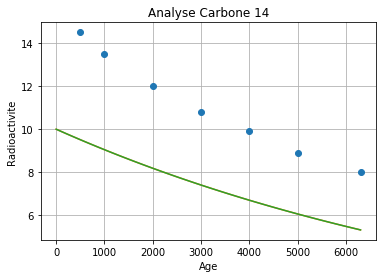

Algorithme de Gauss-Newton
Itere initial:  [1.5e+01 1.0e-04]
------------------------------------------------------------------
k     ||f(beta)||      f(beta)          ||s||          exitflag 
------------------------------------------------------------------
0     0.000000e+00     0.000000e+00     0.000000e+00     0



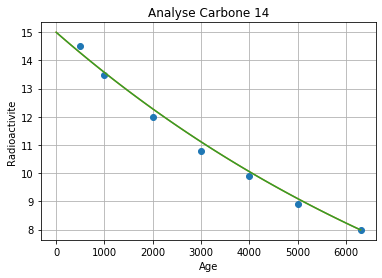

Algorithme de Gauss-Newton
Itere initial:  [1.5e+01 5.0e-04]
------------------------------------------------------------------
k     ||f(beta)||      f(beta)          ||s||          exitflag 
------------------------------------------------------------------
0     0.000000e+00     0.000000e+00     0.000000e+00     0



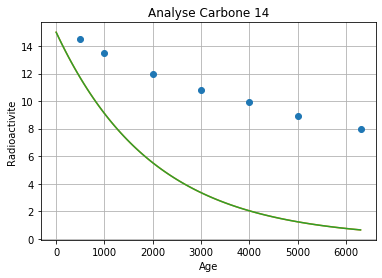

Algorithme de Gauss-Newton
Itere initial:  [1.e+01 5.e-04]
------------------------------------------------------------------
k     ||f(beta)||      f(beta)          ||s||          exitflag 
------------------------------------------------------------------
0     0.000000e+00     0.000000e+00     0.000000e+00     0



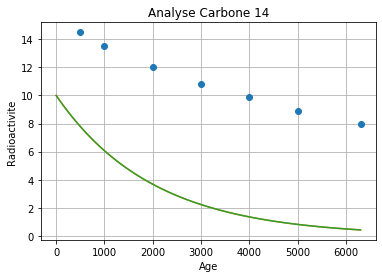

Algorithme de Gauss-Newton
Itere initial:  [1.5e+01 8.0e-04]
------------------------------------------------------------------
k     ||f(beta)||      f(beta)          ||s||          exitflag 
------------------------------------------------------------------
0     0.000000e+00     0.000000e+00     0.000000e+00     0



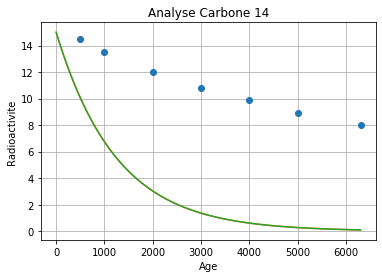

In [8]:
#
# Resolution du probleme Carbone 14 par l'algorithme de Gauss-Newton
#

itmax     = 20

#
# Iteres initiaux
#

beta0_array = np.array([[10, 0.0001],[15, 0.0001],[15, 0.0005],[10, 0.0005],[15, 0.0008]])

#
# Affichage de l'historique de convergence
# 

plt.figure()

for initialisation in range(len(beta0_array)):

    # Choix de l'itere initial
    beta0  = beta0_array[initialisation]
    
    # Affichage
    print('Algorithme de Gauss-Newton')
    print('Itere initial: ',beta0)
    print('------------------------------------------------------------------')
    print('k     ||f(beta)||      f(beta)          ||s||          exitflag ')
    print('------------------------------------------------------------------')
    
    
    # Choix des parametres 
    option = np.array([math.sqrt(1.e-10), 1.e-10, itmax])

    # Appel a l'algorithme en effectuant un nombre maximal d'iterations egal a iteration
    beta, norm_gradf_beta, f_beta, res, norm_s, k, exitflag = GN_ref(residu_C14,jacobienne_res_C14,beta0,option)

    # Affichage de l'historique de convergence
    string = "   "
    print("%d %s %4e %s %4e %s %4e %s %d"%(k,string,norm_gradf_beta,string,f_beta,string,norm_s,string,exitflag))
    
    #
    # Affichage des resultats pour chaque application de l'algorithme
    #    
    if exitflag == 1:
        print("Convergence apres %d iterations !"%(k))
        print("Point solution trouve: ", beta)
        print("Valeur de la fonction objectif au point solution: ", f_beta)
    elif exitflag == 2:
        ## A COMPLETER
        print("Point solution courant: ", beta)
        print()
    elif exitflag == 3:
        ## A COMPLETER
        print()
    elif exitflag == 4:
        print("Nombre maximal d'iterations atteint !" )
    print()
    
    #
    # Affichage de la solution en terme de radioactivite
    #
    T = np.linspace(0,Ti[-1],100)
    A = np.zeros(len(T))
    for i in range(len(T)):
        t = T[i]
        A[i] = beta0[0]*math.exp(-beta0[1]*t)
        
    plt.figure(initialisation+1)
    plt.plot(Ti,Ai,'o')
    plt.plot(T,A)
    for i in range(len(T)):
        t = T[i]
        A[i] = beta[0]*math.exp(-beta[1]*t)
    plt.plot(T,A)
    plt.grid()
    plt.xlabel("Age")
    plt.ylabel("Radioactivite")
    plt.title("Analyse Carbone 14")
    plt.show()

<div style="background:LightGrey">

- Récapituler ici les valeurs des paramètres $A_{0}$ et $\lambda $ obtenus au final pour chacun des choix de l'itéré initial. 

- Représenter la fonction objectif pour vérifier vos résultats. 

### Fonction objectif

<div style="background:LightGrey">
    
- Implémenter la fonction objectif associée au problème proposé.

In [9]:
def objectif(beta):
    """
    % Input:
    % ------
    % beta : vecteur des paramètres
    %        float(p)
    %
    % Output:
    % -------
    % res : (1/2)||residu(beta)||^2
    %       float
    """ 
    f = 0
    
    # Inserer vos lignes de code ici
    
    return f


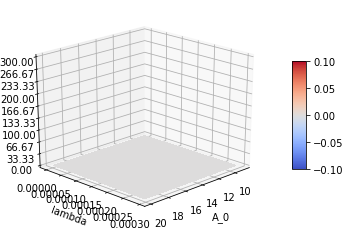

In [10]:
#
# Cette visualisation vous permet de valider vos resultats
#
#
# Normalement les lignes de code ne doivent pas etre modifiees dans ce qui suit
#
fig = plt.figure()
ax  = fig.gca(projection='3d')

# Creation de X et Y
X    = np.arange(9.0, 20.0, 11./100.)
Y    = np.arange(0., 0.0003, 0.0003/50.)
X, Y = np.meshgrid(X, Y)
Z    = np.sqrt(X**2 + Y**2)

# Not the smartest way to fill Z...
for item in range(len(X)):
    xs       = X[item]
    for itemy in range(len(Y[0])):
        y     = Y[item][itemy]
        count = 0
        for x in xs:
            Z[item][count] = objectif(np.array([x,y]))
            count         += 1

# Creation de la surface
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Legendes
ax.set_zlim(0., 300)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.view_init(elev=22.5, azim=45)

# Echelles colorees
fig.colorbar(surf, shrink=0.5, aspect=7.5)
plt.xlabel('A_0')
plt.ylabel('lambda')
plt.show()

## Algorithme de Newton

### Questions
<div style="background:LightGrey">
    
* Dans l'algoritme de Newton, de quelles fonctions dépendant du problème a-t-on besoin?
    
* Donner les avantages et inconvénients éventuels de la méthode de Gauss-Newton par rapport à l'algorithme de Newton. 

### De la même façon que pour Gauss-Newton écrivez une fonction qui code l'algorithme de Newton
Vous testerez votre fonction sur le même problème `Carbonne 14`